In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Utiliser un chemin d'accès correct sous Windows
# df = pd.read_csv(r'C:\Users\shami\Downloads\equilibre-regional-mensuel-prod-conso-brute.csv', sep=';')

# Si import depuis colab
df = pd.read_csv('/content/equilibre-regional-mensuel-prod-conso-brute.csv', sep=';')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Mois                            1560 non-null   object 
 1   Code INSEE région               1560 non-null   int64  
 2   Région                          1560 non-null   object 
 3   Production totale (MWh)         1560 non-null   float64
 4   Pompage (MWh)                   1560 non-null   float64
 5   Solde échanges physiques (MWh)  1560 non-null   float64
 6   Consommation brute (MWh)        1560 non-null   float64
 7   Géo-shape région                1560 non-null   object 
 8   Géo-point région                1560 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 109.8+ KB


In [4]:
df.isnull().sum()

,0
Mois,0
Code INSEE région,0
Région,0
Production totale (MWh),0
Pompage (MWh),0
Solde échanges physiques (MWh),0
Consommation brute (MWh),0
Géo-shape région,0
Géo-point région,0


In [5]:
df['Mois'] = pd.to_datetime(df['Mois'], format='%Y-%m')

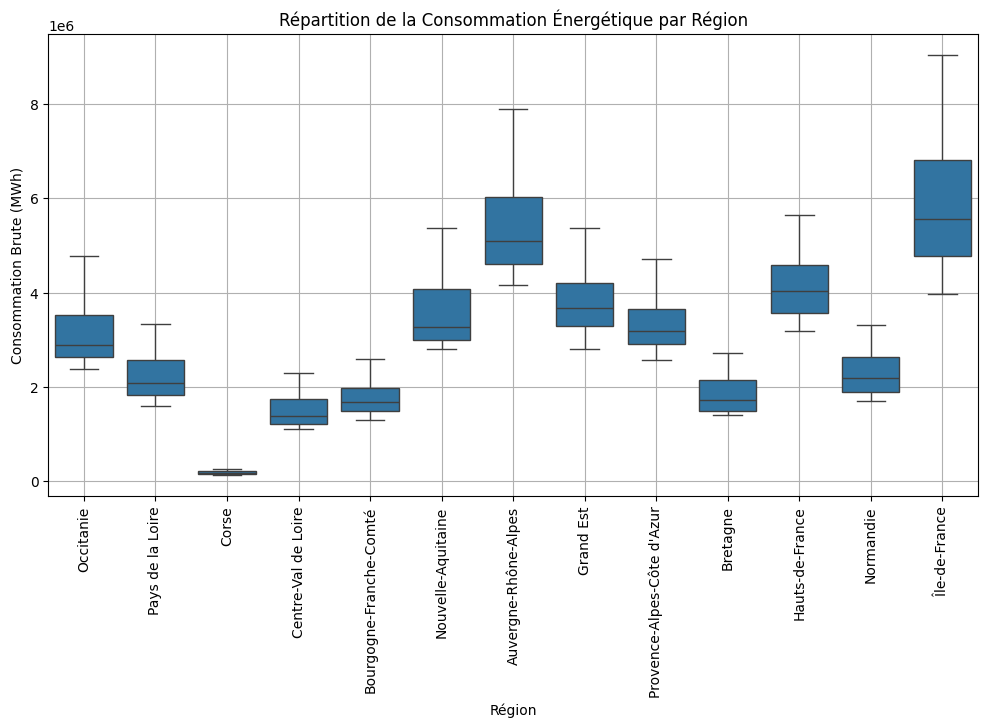

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Région', y='Consommation brute (MWh)', data=df)
plt.xticks(rotation=90)
plt.xlabel('Région')
plt.ylabel('Consommation Brute (MWh)')
plt.title('Répartition de la Consommation Énergétique par Région')
plt.grid(True)
plt.show()

<ipython-input-7-90b3d62750dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Région', y='Solde (MWh)', data=df, palette='coolwarm')


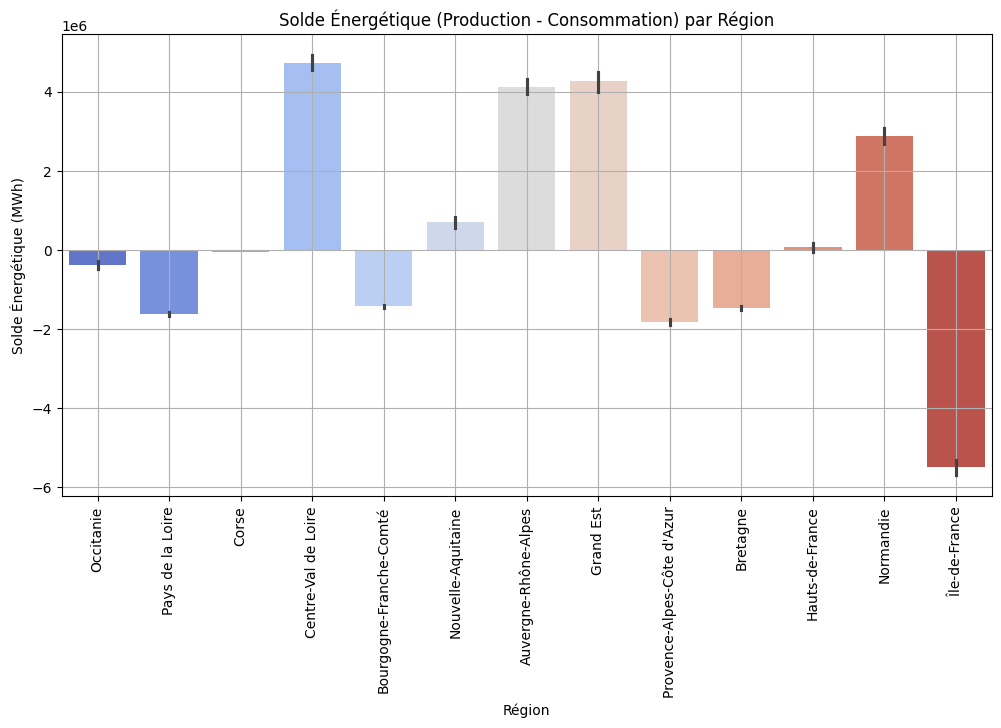

In [7]:
df['Solde (MWh)'] = df['Production totale (MWh)'] - df['Consommation brute (MWh)']

plt.figure(figsize=(12, 6))
sns.barplot(x='Région', y='Solde (MWh)', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Région')
plt.ylabel('Solde Énergétique (MWh)')
plt.title('Solde Énergétique (Production - Consommation) par Région')
plt.grid(True)
plt.show()

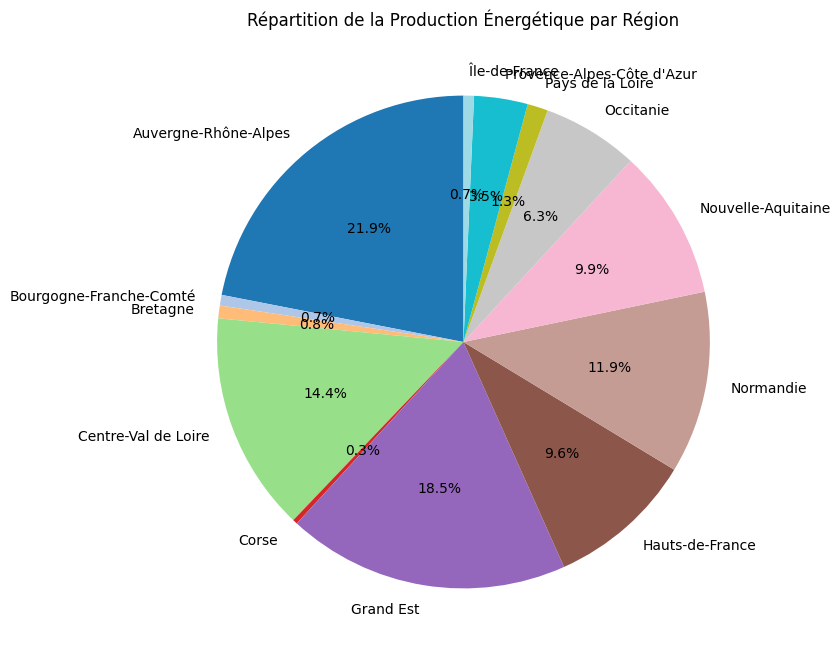

In [8]:
production_par_region = df.groupby('Région')['Production totale (MWh)'].sum()

plt.figure(figsize=(8, 8))
production_par_region.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20')
plt.title('Répartition de la Production Énergétique par Région')
plt.ylabel('')
plt.show()


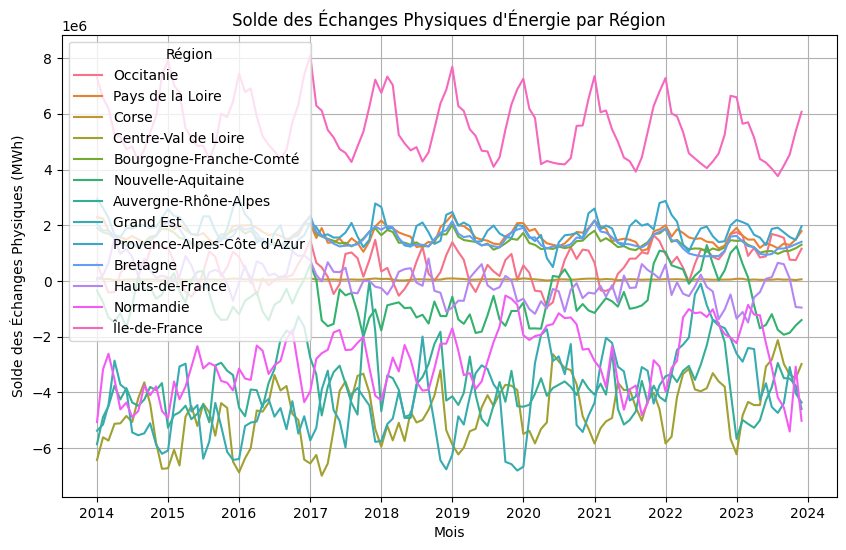

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Mois', y='Solde échanges physiques (MWh)', hue='Région')
plt.xlabel('Mois')
plt.ylabel('Solde des Échanges Physiques (MWh)')
plt.title('Solde des Échanges Physiques d\'Énergie par Région')
plt.grid(True)
plt.show()

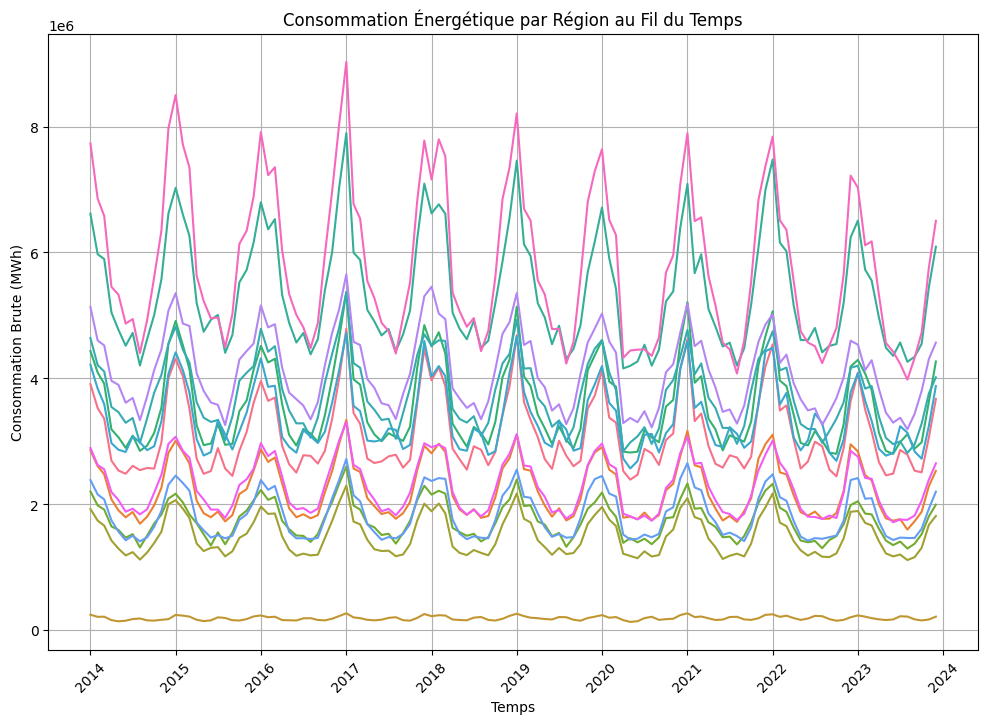

In [10]:
df['Mois'] = pd.to_datetime(df['Mois'], format='%Y-%m')

# Visualiser la consommation énergétique pour chaque région au fil du temps
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Mois', y='Consommation brute (MWh)', hue='Région', legend=False)
plt.xlabel('Temps')
plt.ylabel('Consommation Brute (MWh)')
plt.title('Consommation Énergétique par Région au Fil du Temps')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

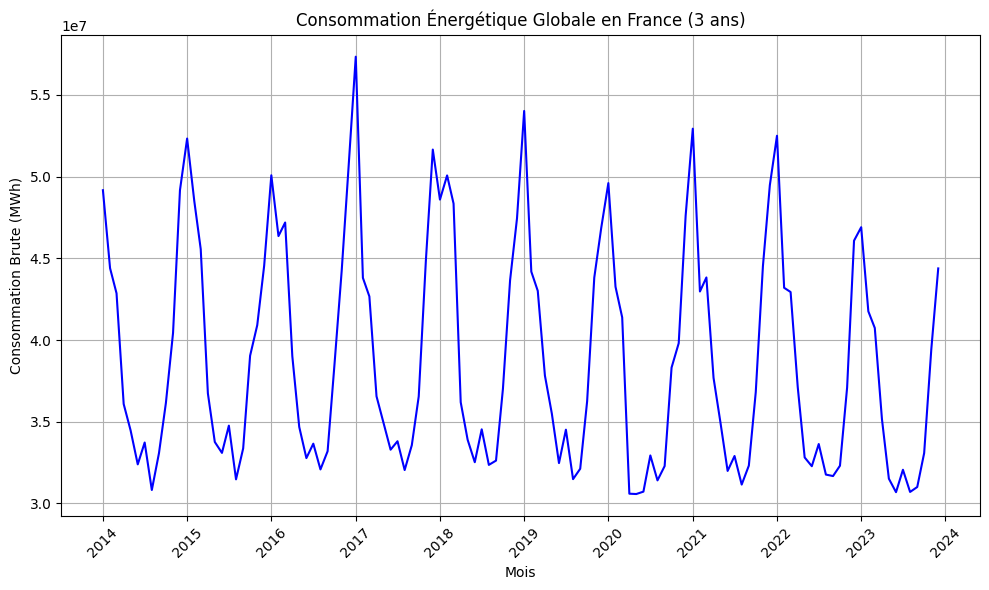

In [11]:
df_global = df.groupby('Mois')['Consommation brute (MWh)'].sum().reset_index()

# Afficher la consommation globale mensuelle
plt.figure(figsize=(10, 6))
plt.plot(df_global['Mois'], df_global['Consommation brute (MWh)'], label='Consommation Réelle', color='blue')
plt.xlabel('Mois')
plt.ylabel('Consommation Brute (MWh)')
plt.title('Consommation Énergétique Globale en France (3 ans)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Nettoyage des données consommation :

In [12]:
# Nettoyage de la consommation
df_conso_clean = df[['Mois', 'Région', 'Consommation brute (MWh)']].copy()
df_conso_clean = df_conso_clean.dropna()
df_conso_clean['Mois'] = pd.to_datetime(df_conso_clean['Mois'], format='%Y-%m')

2. Ajout du mapping et préparation météo :


In [14]:
df_mensuel = pd.read_csv('/content/df_mensuel.csv')  # Mets le chemin correct si tu l'importes

In [16]:
# 🗺️ Mapping complet Département → Région
departement_to_region = {
    '01': 'Auvergne-Rhône-Alpes', '02': 'Hauts-de-France', '03': 'Auvergne-Rhône-Alpes', '04': 'Provence-Alpes-Côte d\'Azur',
    '05': 'Provence-Alpes-Côte d\'Azur', '06': 'Provence-Alpes-Côte d\'Azur', '07': 'Auvergne-Rhône-Alpes', '08': 'Grand Est',
    '09': 'Occitanie', '10': 'Grand Est', '11': 'Occitanie', '12': 'Occitanie', '13': 'Provence-Alpes-Côte d\'Azur',
    '14': 'Normandie', '15': 'Auvergne-Rhône-Alpes', '16': 'Nouvelle-Aquitaine', '17': 'Nouvelle-Aquitaine',
    '18': 'Centre-Val de Loire', '19': 'Nouvelle-Aquitaine', '2A': 'Corse', '2B': 'Corse', '21': 'Bourgogne-Franche-Comté',
    '22': 'Bretagne', '23': 'Nouvelle-Aquitaine', '24': 'Nouvelle-Aquitaine', '25': 'Bourgogne-Franche-Comté',
    '26': 'Auvergne-Rhône-Alpes', '27': 'Normandie', '28': 'Centre-Val de Loire', '29': 'Bretagne', '30': 'Occitanie',
    '31': 'Occitanie', '32': 'Occitanie', '33': 'Nouvelle-Aquitaine', '34': 'Occitanie', '35': 'Bretagne',
    '36': 'Centre-Val de Loire', '37': 'Centre-Val de Loire', '38': 'Auvergne-Rhône-Alpes', '39': 'Bourgogne-Franche-Comté',
    '40': 'Nouvelle-Aquitaine', '41': 'Centre-Val de Loire', '42': 'Auvergne-Rhône-Alpes', '43': 'Auvergne-Rhône-Alpes',
    '44': 'Pays de la Loire', '45': 'Centre-Val de Loire', '46': 'Occitanie', '47': 'Nouvelle-Aquitaine',
    '48': 'Occitanie', '49': 'Pays de la Loire', '50': 'Normandie', '51': 'Grand Est', '52': 'Grand Est',
    '53': 'Pays de la Loire', '54': 'Grand Est', '55': 'Grand Est', '56': 'Bretagne', '57': 'Grand Est',
    '58': 'Bourgogne-Franche-Comté', '59': 'Hauts-de-France', '60': 'Hauts-de-France', '61': 'Normandie',
    '62': 'Hauts-de-France', '63': 'Auvergne-Rhône-Alpes', '64': 'Nouvelle-Aquitaine', '65': 'Occitanie',
    '66': 'Occitanie', '67': 'Grand Est', '68': 'Grand Est', '69': 'Auvergne-Rhône-Alpes', '70': 'Bourgogne-Franche-Comté',
    '71': 'Bourgogne-Franche-Comté', '72': 'Pays de la Loire', '73': 'Auvergne-Rhône-Alpes', '74': 'Auvergne-Rhône-Alpes',
    '75': 'Île-de-France', '76': 'Normandie', '77': 'Île-de-France', '78': 'Île-de-France', '79': 'Nouvelle-Aquitaine',
    '80': 'Hauts-de-France', '81': 'Occitanie', '82': 'Occitanie', '83': 'Provence-Alpes-Côte d\'Azur',
    '84': 'Provence-Alpes-Côte d\'Azur', '85': 'Pays de la Loire', '86': 'Nouvelle-Aquitaine', '87': 'Nouvelle-Aquitaine',
    '88': 'Grand Est', '89': 'Bourgogne-Franche-Comté', '90': 'Bourgogne-Franche-Comté', '91': 'Île-de-France',
    '92': 'Île-de-France', '93': 'Île-de-France', '94': 'Île-de-France', '95': 'Île-de-France'
}

# 🧩 Ajouter la région à partir du code département
df_mensuel['Région'] = df_mensuel['Code INSEE département'].map(departement_to_region)

# 🧹 Nettoyage : on garde seulement les lignes mappées
df_meteo_region = df_mensuel.dropna(subset=['Région'])

# 📊 Moyennes régionales mensuelles des températures
df_temp_reg = df_meteo_region.groupby(['Région', 'Mois'])[['TMoy (°C)', 'TMin (°C)', 'TMax (°C)']].mean().reset_index()


In [18]:
# 🔄 Forcer le format datetime dans les deux DataFrames
df_conso_clean['Mois'] = pd.to_datetime(df_conso_clean['Mois'])
df_temp_reg['Mois'] = pd.to_datetime(df_temp_reg['Mois'])

3. Fusion

In [19]:
# Fusion météo + conso
df_merged = pd.merge(df_conso_clean, df_temp_reg, on=['Région', 'Mois'])

# Aperçu
df_merged.head()

,Mois,Région,Consommation brute (MWh),TMoy (°C),TMin (°C),TMax (°C)
0,2018-01-01,Normandie,2903465.0,7.397742,5.064903,9.731097
1,2018-01-01,Grand Est,4518831.0,6.433968,3.904839,8.962516
2,2018-01-01,Bretagne,2367717.0,8.816290,6.459839,11.172903
3,2018-01-01,Occitanie,3967825.0,8.373797,5.220546,11.527866
4,2018-01-01,Corse,219795.0,12.449839,9.090645,15.824516


Maintenant qu'on a les températures régionales ET la consommation fusionnées dans df_merged, on fait la régression linéaire multiple pour prédire la consommation énergétique à partir des températures.

# Régression Multiple

In [20]:
df_merged.info()
df_merged.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Mois                      936 non-null    datetime64[ns]
 1   Région                    936 non-null    object        
 2   Consommation brute (MWh)  936 non-null    float64       
 3   TMoy (°C)                 936 non-null    float64       
 4   TMin (°C)                 936 non-null    float64       
 5   TMax (°C)                 936 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 44.0+ KB


,Mois,Consommation brute (MWh),TMoy (°C),TMin (°C),TMax (°C)
count,936,9.360000e+02,936.000000,936.000000,936.000000
mean,2020-12-15 15:19:59.999999744,2.948824e+06,13.418206,8.943390,17.893038
min,2018-01-01 00:00:00,1.288290e+05,0.591750,-2.482750,3.666393
25%,2019-06-23 12:00:00,1.784497e+06,8.393167,4.722009,12.137015
50%,2020-12-16 12:00:00,2.846366e+06,12.856375,8.436840,17.362992
75%,2022-06-08 12:00:00,4.040766e+06,18.479421,13.366933,23.730479
max,2023-12-01 00:00:00,8.208853e+06,26.537742,22.303065,32.258710
std,NaN,1.596835e+06,5.868014,5.137256,6.781884


Il n'y a pas de valeurs manquantes, on a bien 936 valeurs non-nulles

2. Régression : prédire la consommation à partir des températures

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 🎯 Variables explicatives et variable cible
X = df_merged[['TMoy (°C)', 'TMin (°C)', 'TMax (°C)']]
y = df_merged['Consommation brute (MWh)']

# 🔀 Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔧 Modèle
model = LinearRegression()
model.fit(X_train, y_train)

# ✅ Prédiction
y_pred = model.predict(X_test)

# 📊 Évaluation
print("RMSE :", mean_squared_error(y_test, y_pred, squared=False))
print("R² :", r2_score(y_test, y_pred))

TypeError: got an unexpected keyword argument 'squared'

✅ Résultats de la régression :
• RMSE : 1462094.84
• R² : 0.1811
    Variable   Coefficient
0  TMoy (°C)  1.735745e+08
1  TMin (°C) -8.701000e+07
2  TMax (°C) -8.671257e+07


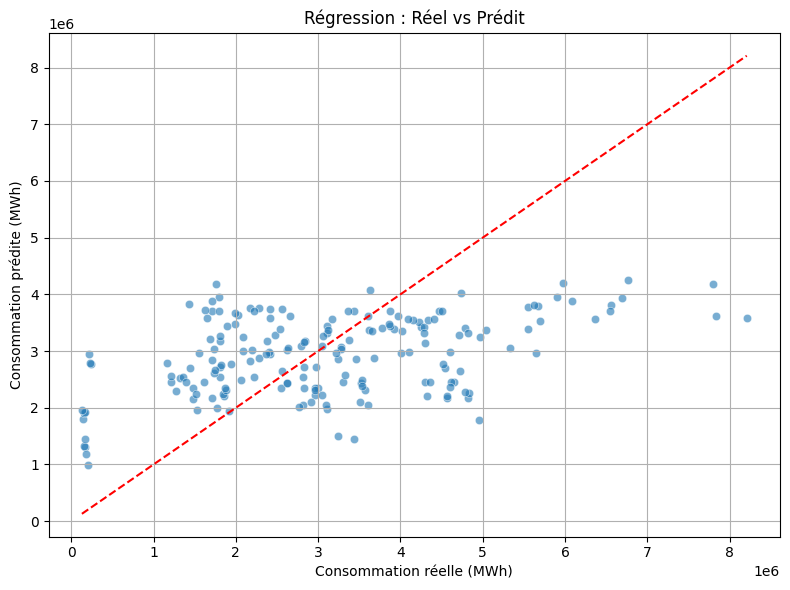

In [23]:
# 📦 Imports utiles
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 🎯 Sélection des variables explicatives et de la cible
X = df_merged[['TMoy (°C)', 'TMin (°C)', 'TMax (°C)']]
y = df_merged['Consommation brute (MWh)']

# 🔀 Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚙️ Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# 🔮 Prédiction sur le jeu de test
y_pred = model.predict(X_test)

# 📊 Évaluation du modèle
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Résultats de la régression :")
print("• RMSE :", round(rmse, 2))
print("• R² :", round(r2, 4))

# 📌 Coefficients du modèle
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

# 📉 Visualisation des résultats
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Consommation réelle (MWh)")
plt.ylabel("Consommation prédite (MWh)")
plt.title("Régression : Réel vs Prédit")
plt.grid(True)
plt.tight_layout()
plt.show()

- Interprétation des Résultats de la Régression (élèves)

Nous avons entraîné un modèle de régression linéaire multiple afin de prédire la consommation énergétique mensuelle à partir des températures moyennes, minimales et maximales par région.
Les résultats obtenus sont les suivants :

- RMSE (Root Mean Squared Error) : 1 462 094 MWh

- R² (coefficient de détermination) : 0,1811

Ces résultats indiquent que le modèle n'explique qu’environ 18 % de la variance de la consommation énergétique.

Autrement dit, les seules températures ne suffisent pas à modéliser correctement la consommation, bien qu’elles jouent un rôle non négligeable.

L’analyse des coefficients du modèle révèle que :

Une hausse de la température moyenne est associée à une augmentation de la consommation (coefficient positif).

En revanche, les températures minimales et maximales ont un effet négatif sur la consommation dans ce modèle, ce qui peut indiquer une colinéarité ou un effet non linéaire non capturé.

Enfin, le nuage de points comparant les valeurs réelles et prédites montre une grande dispersion autour de la diagonale parfaite, traduisant des erreurs de prédiction importantes dans certaines régions ou périodes.



Explication pour le public

Nous avons testé un modèle simple pour voir si la température permettrait de prédire la consommation d’énergie dans les différentes régions françaises.

Le résultat montre qu’il existe bien une relation entre la météo et la consommation, mais qu’elle n’explique qu’une partie limitée du phénomène.

En effet, la température ne suffit pas à elle seule : d’autres facteurs comme l’activité économique, les habitudes de chauffage, ou encore la population locale jouent sûrement un rôle important.

Le modèle a correctement repéré des tendances globales (par exemple : plus il fait froid, plus on consomme), mais il reste trop imprécis pour faire de bonnes prévisions dans tous les cas.

Cette étape reste importante, car elle confirme que la météo a un impact, et nous oriente vers des modèles plus riches combinant d’autres données, comme les revenus, la densité de population ou le type de logements.

# Modélisation en séries temporelles

Objectif : prédire la consommation énergétique mensuelle future d’une région à partir de ses données historiques.

1. Préparation des données

In [25]:
# S'assurer que les données sont bien triées par date
df_conso_clean = df_conso_clean.sort_values(['Région', 'Mois'])

# Exemple : Focus sur une seule région (ex : Île-de-France)
region = "Île-de-France"
df_region = df_conso_clean[df_conso_clean['Région'] == region][['Mois', 'Consommation brute (MWh)']].copy()
df_region.set_index('Mois', inplace=True)

2. Visualisation simple de la série


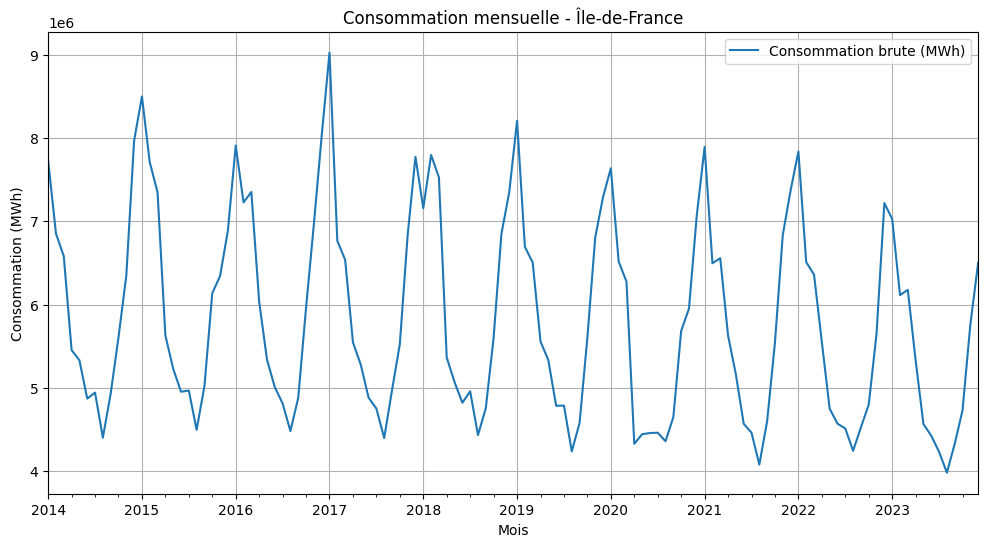

In [26]:
import matplotlib.pyplot as plt

df_region.plot(figsize=(12, 6), title=f"Consommation mensuelle - {region}")
plt.ylabel("Consommation (MWh)")
plt.grid(True)
plt.show()

Modèle ARIMA ou Prophet

- ARIMA (standard, simple à tester rapidement)

- Prophet (plus visuel, plus flexible, mais nécessite installation)

Utilisons Prophet pour une prédiction plus parlante.

Préparation des données

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpounb99vu/kj5uc87h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpounb99vu/rr90_yvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77804', 'data', 'file=/tmp/tmpounb99vu/kj5uc87h.json', 'init=/tmp/tmpounb99vu/rr90_yvn.json', 'output', 'file=/tmp/tmpounb99vu/prophet_modelq31_hvik/prophet_model-20250324194157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:41:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:41:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

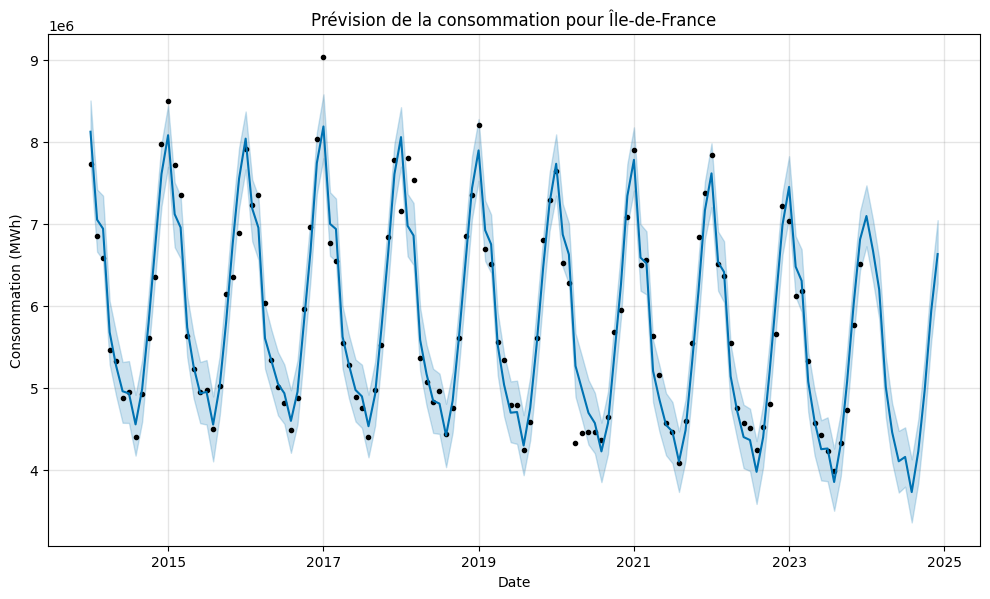

In [29]:
from prophet import Prophet

# Focus sur une région
region = "Île-de-France"
df_prophet = df_conso_clean[df_conso_clean['Région'] == region][['Mois', 'Consommation brute (MWh)']].copy()

# Renommage pour Prophet
df_prophet.rename(columns={"Mois": "ds", "Consommation brute (MWh)": "y"}, inplace=True)

# Vérification
df_prophet.head()


# Étape 3 : Entraînement du modèle
model = Prophet()
model.fit(df_prophet)

# Étape 4 : Générer les dates futures
future = model.make_future_dataframe(periods=12, freq='M')
future.tail()

#  Étape 5 : Prédiction et visualisation
forecast = model.predict(future)

# 📈 Visualisation automatique avec Prophet
fig1 = model.plot(forecast)
plt.title(f"Prévision de la consommation pour {region}")
plt.xlabel("Date")
plt.ylabel("Consommation (MWh)")
plt.grid(True)
plt.show()

Analyse – Région : Île-de-France

Ce graphique montre l'évolution de la consommation énergétique mensuelle en Île-de-France, ainsi que sa projection future sur 12 mois.

🔹 Ligne bleue : prédiction de la consommation.

🔹 Zone bleue claire : intervalle de confiance (incertitude de la prévision).

🔹 Points noirs : données historiques réelles.

Observations :

- Forte saisonnalité :
chaque année, la consommation suit un cycle très net ; Pics en hiver (chauffage électrique), et Creux en été.

- Prévision réaliste : Le modèle capte bien cette saisonnalité et l’extrapole sur les mois à venir.

- Incertitude maîtrisée : La zone bleue reste relativement étroite, ce qui montre que le modèle est confiant dans ses prévisions.

À retenir :

En Île-de-France, la consommation d’électricité est fortement influencée par les saisons, avec un pic en hiver. Prophet parvient à capter cette logique et peut donc être utilisé pour anticiper la demande énergétique et mieux la gérer.

# Comparaison avec PACA

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpounb99vu/_vxio9d7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpounb99vu/hb4p9u3j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40851', 'data', 'file=/tmp/tmpounb99vu/_vxio9d7.json', 'init=/tmp/tmpounb99vu/hb4p9u3j.json', 'output', 'file=/tmp/tmpounb99vu/prophet_modeln5506vvc/prophet_model-20250324194823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:48:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:48:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

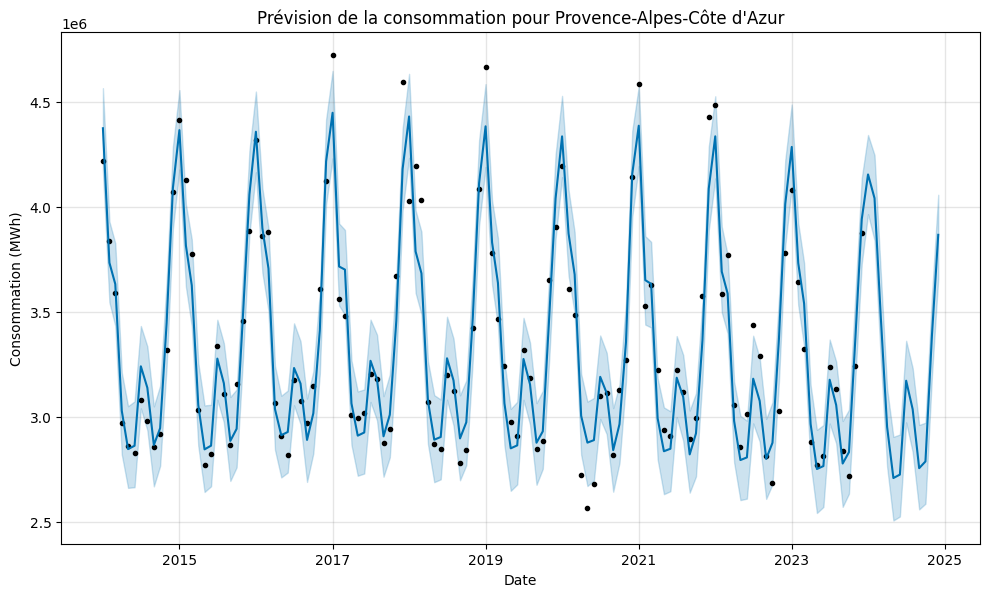

In [30]:
# 📍 Nouvelle région à analyser
region = "Provence-Alpes-Côte d'Azur"

# Préparer les données pour Prophet
df_prophet = df_conso_clean[df_conso_clean['Région'] == region][['Mois', 'Consommation brute (MWh)']].copy()
df_prophet.rename(columns={"Mois": "ds", "Consommation brute (MWh)": "y"}, inplace=True)

# Entraîner un nouveau modèle Prophet
model = Prophet()
model.fit(df_prophet)

# Générer les prévisions pour les 12 prochains mois
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Visualisation
fig2 = model.plot(forecast)
plt.title(f"Prévision de la consommation pour {region}")
plt.xlabel("Date")
plt.ylabel("Consommation (MWh)")
plt.grid(True)
plt.show()

Comparaison !

🔹 1. Niveaux de consommation :

IDF consomme nettement plus d’énergie que PACA :

➤ En moyenne entre 6 et 9 millions de MWh/mois.

➤ PACA varie entre 2,8 et 4,5 millions de MWh/mois.

👉 Cela reflète la densité de population, le poids économique et les besoins en chauffage/climatisation.

🔹 2. Saisonnalité :

Les deux régions présentent une forte saisonnalité annuelle, avec un pic hivernal très marqué (notamment en décembre-janvier) et un creux estival.

En PACA, les pics sont parfois plus brusques → peut indiquer une sensibilité accrue aux variations de température, notamment pour la climatisation.

🔹 3. Tendance et stabilité :

Île-de-France montre une tendance légèrement décroissante depuis 2021. Cela peut indiquer une meilleure efficacité énergétique ou un ralentissement économique.

PACA reste plus stable, avec des fluctuations régulières autour d’une moyenne constante.

EN RESUME ;

La modélisation confirme que l’Île-de-France est de loin la région la plus énergivore, avec une tendance à la baisse.

En comparaison, PACA consomme moins mais reste très sensible aux cycles saisonniers.

Ce type d’analyse permet d’anticiper les besoins énergétiques régionaux et d’adapter les politiques publiques.

#  Clustering
Objectif : Identifier des groupes de régions ayant un profil de consommation énergétique similaire, éventuellement influencés par la météo.

In [31]:
# Base fusionnée utilisée pour la régression
df_merged

,Mois,Région,Consommation brute (MWh),TMoy (°C),TMin (°C),TMax (°C)
0,2018-01-01,Normandie,2903465.0,7.397742,5.064903,9.731097
1,2018-01-01,Grand Est,4518831.0,6.433968,3.904839,8.962516
2,2018-01-01,Bretagne,2367717.0,8.816290,6.459839,11.172903
3,2018-01-01,Occitanie,3967825.0,8.373797,5.220546,11.527866
4,2018-01-01,Corse,219795.0,12.449839,9.090645,15.824516
...,...,...,...,...,...,...
931,2021-06-01,Bretagne,1511395.0,16.182083,12.656583,19.707250
932,2021-06-01,Provence-Alpes-Côte d'Azur,2908481.0,21.824222,16.477722,27.171278
933,2021-07-01,Île-de-France,4457591.0,19.699960,15.239637,24.160524
934,2021-07-01,Nouvelle-Aquitaine,3093549.0,19.941317,15.208710,24.673683


On va regrouper par région, pour calculer :

- La moyenne annuelle de consommation (Consommation brute (MWh))

- La température moyenne annuelle (TMoy (°C)), éventuellement TMin et TMax.

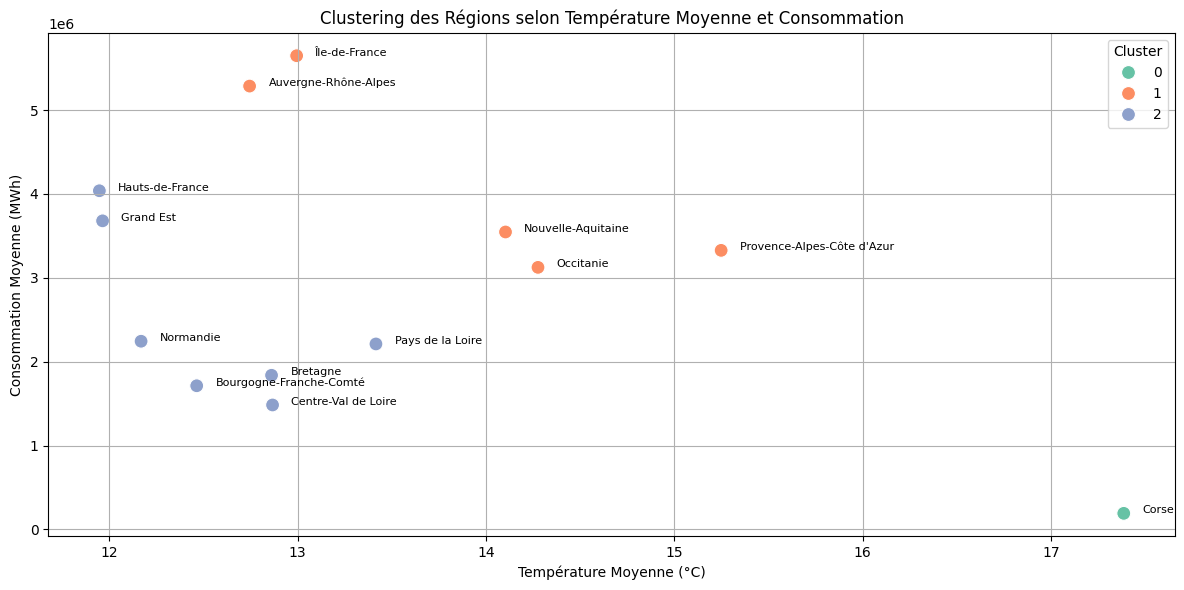

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Étape 1 : Moyennes par région
df_clust = df_merged.groupby('Région')[
    ['Consommation brute (MWh)', 'TMoy (°C)', 'TMin (°C)', 'TMax (°C)']
].mean().reset_index()

# Étape 2 : Standardisation des données
features = df_clust.drop(columns='Région')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Étape 3 : Clustering avec KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_clust['Cluster'] = kmeans.fit_predict(X_scaled)

# Étape 4 : Visualisation des clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_clust,
    x='TMoy (°C)', y='Consommation brute (MWh)',
    hue='Cluster', palette='Set2', s=100
)

# Annoter les régions
for i, row in df_clust.iterrows():
    plt.text(row['TMoy (°C)'] + 0.1, row['Consommation brute (MWh)'], row['Région'], fontsize=8)

plt.title("Clustering des Régions selon Température Moyenne et Consommation")
plt.xlabel("Température Moyenne (°C)")
plt.ylabel("Consommation Moyenne (MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()




Observations :

Le clustering met en évidence trois grands profils régionaux :

1. Cluster 0 (Corse) : Région atypique avec une température très élevée et une consommation très faible.

2. Cluster 1 : Regroupe les régions à forte consommation (Île-de-France, Auvergne-Rhône-Alpes, PACA, etc.), souvent denses et urbanisées, avec des températures modérées à élevées.

3. Cluster 2 : Comprend des régions à consommation plus modérée, et températures plus basses, souvent moins peuplées ou moins industrialisées.

# Détection d'anomalies

Objectif : Détecter les mois avec une consommation anormale

-> On va utiliser Isolation Forest, un algorithme bien adapté à la détection d’outliers.

In [34]:
# Imports en haut du notebook
from sklearn.ensemble import IsolationForest

# 1. Préparation des données
df_anomaly = df_conso_clean.copy()
df_anomaly['Mois'] = pd.to_datetime(df_anomaly['Mois'])

# Pour chaque région, appliquer le modèle
results = []

for region in df_anomaly['Région'].unique():
    df_region = df_anomaly[df_anomaly['Région'] == region].copy()

    # Model sur la consommation seule (peut être enrichi)
    X = df_region[['Consommation brute (MWh)']]
    model = IsolationForest(contamination=0.05, random_state=42)
    df_region['Anomalie'] = model.fit_predict(X)

    results.append(df_region)

# 2. Regroupement des résultats
df_anomalies = pd.concat(results)

# 3. Affichage des anomalies (anomalie = -1)
df_anomalies_only = df_anomalies[df_anomalies['Anomalie'] == -1]
df_anomalies_only.head()

,Mois,Région,Consommation brute (MWh),Anomalie
35,2017-01-01,Auvergne-Rhône-Alpes,7895235.0,-1
544,2017-12-01,Auvergne-Rhône-Alpes,7092864.0,-1
566,2019-01-01,Auvergne-Rhône-Alpes,7457570.0,-1
147,2020-04-01,Auvergne-Rhône-Alpes,4156370.0,-1
1172,2021-12-01,Auvergne-Rhône-Alpes,6993220.0,-1


📈 Option de visualisation rapide pour une région :

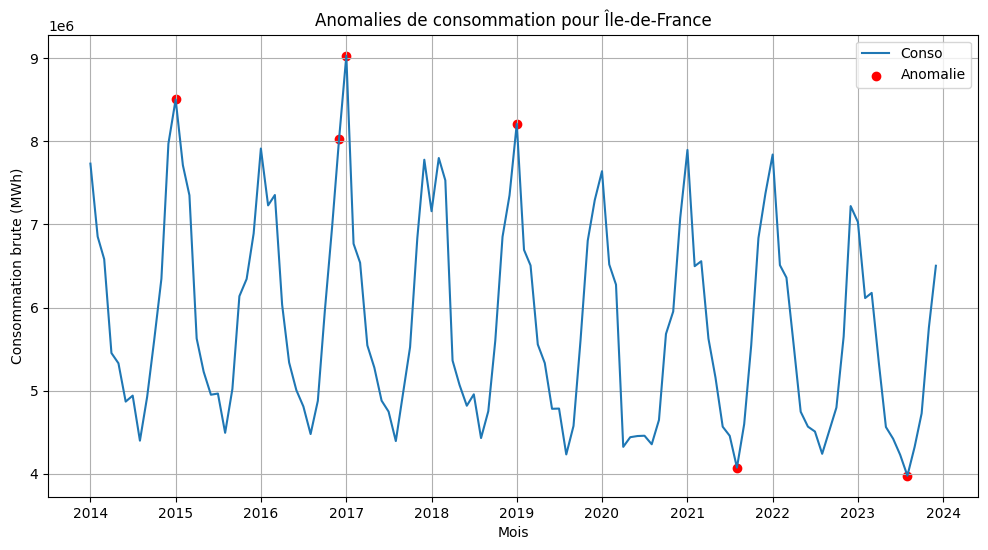

In [35]:
import matplotlib.pyplot as plt

region = "Île-de-France"
df_plot = df_anomalies[df_anomalies['Région'] == region]

plt.figure(figsize=(12,6))
plt.plot(df_plot['Mois'], df_plot['Consommation brute (MWh)'], label='Conso')
plt.scatter(
    df_plot[df_plot['Anomalie'] == -1]['Mois'],
    df_plot[df_plot['Anomalie'] == -1]['Consommation brute (MWh)'],
    color='red', label='Anomalie'
)
plt.title(f"Anomalies de consommation pour {region}")
plt.xlabel("Mois")
plt.ylabel("Consommation brute (MWh)")
plt.legend()
plt.grid(True)
plt.show()


Interprétation :    

Les points rouges indiquent les mois identifiés comme anormaux (outliers) par l’algorithme Isolation Forest.

On observe des pics très élevés vers 2015, 2017, et 2019. Ces anomalies sont probablement liées à :

- des vagues de froid (augmentation du chauffage),

- des pics industriels,

- ou des erreurs / ruptures de données.

Inversement, les points très bas en 2021 et 2023-2024 pourraient s’expliquer par :

- des confinements liés à la pandémie (activité économique réduite),

- des hivers exceptionnellement doux.

👉 On peut donc supposer que l’algorithme a bien capté des ruptures ou extrêmes dans la tendance de consommation.

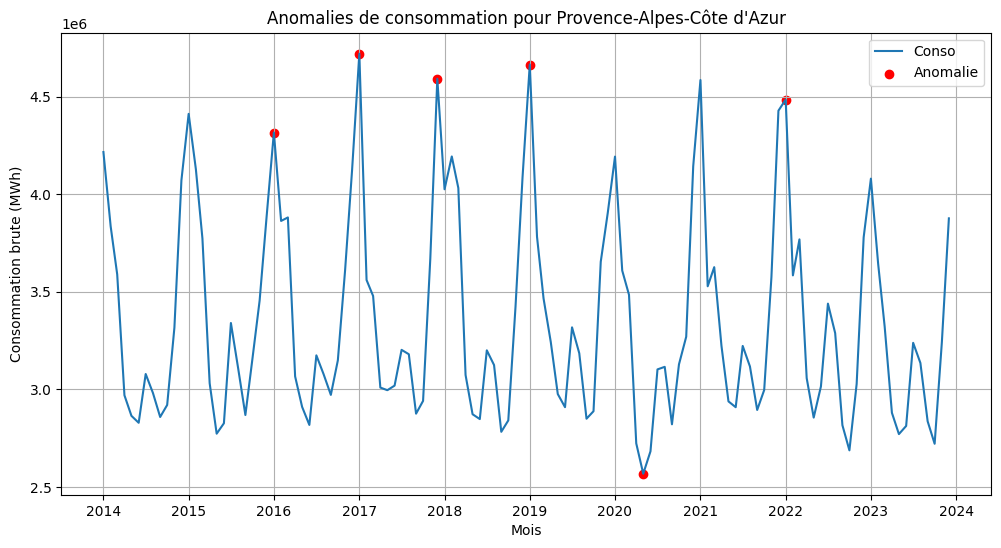

In [36]:
import matplotlib.pyplot as plt

region = "Provence-Alpes-Côte d'Azur"  # 🌍 Changement de région
df_plot = df_anomalies[df_anomalies['Région'] == region]

plt.figure(figsize=(12,6))
plt.plot(df_plot['Mois'], df_plot['Consommation brute (MWh)'], label='Conso')
plt.scatter(
    df_plot[df_plot['Anomalie'] == -1]['Mois'],
    df_plot[df_plot['Anomalie'] == -1]['Consommation brute (MWh)'],
    color='red', label='Anomalie'
)
plt.title(f"Anomalies de consommation pour {region}")
plt.xlabel("Mois")
plt.ylabel("Consommation brute (MWh)")
plt.legend()
plt.grid(True)
plt.show()

Comparaison générale :       

1. Île-de-France :

- Région la plus peuplée de France → consommation globalement plus élevée (jusqu'à 9 millions de MWh/mois).

- Les pics de consommation anormaux détectés sont tous très élevés : souvent des hivers rigoureux ou des mois exceptionnellement froids.

- Anomalies également détectées autour de 2023 avec des creux soudains, potentiellement liés à : une baisse d’activité (COVID, télétravail, sobriété énergétique), ou des erreurs de mesure/reporting.

2. Provence-Alpes-Côte d’Azur :

- Niveau de consommation inférieur (autour de 3–4,5 millions de MWh).

- Les anomalies détectées ne sont pas toujours des pics extrêmes, mais souvent des écarts soudains par rapport à la saisonnalité.

- Les creux comme en 2020 semblent aussi liés à des chocs externes (crise COVID ?).

- Montre une saisonnalité plus marquée avec des hivers moins exigeants énergétiquement.

Les anomalies énergétiques sont bien plus marquées en Île-de-France, où l'effet de masse (population, bâtiments, transports) rend la consommation très sensible aux variations climatiques ou économiques.

En PACA, les pics sont plus modérés mais des fluctuations inhabituelles sont aussi détectées, témoignant de la diversité des usages régionaux.

Ces résultats confirment l’utilité de modèles de détection d’anomalies pour prévenir ou expliquer des comportements énergétiques anormaux.

# Conclusion de la Partie 2 – Modélisation
Les différentes approches de modélisation ont permis de mieux comprendre les dynamiques de consommation énergétique à l’échelle régionale :

1. La régression a montré que les températures jouent un rôle significatif mais pas suffisant à elles seules pour prédire la consommation.

2. Les séries temporelles (Prophet) se sont révélées efficaces pour anticiper les variations mensuelles de consommation, avec des prévisions robustes et visuellement cohérentes.

3. Le clustering a permis d’identifier des groupes de régions ayant des profils similaires de température et de consommation, mettant en évidence des typologies énergétiques.

4. La détection d’anomalies a révélé des mois atypiques de consommation, ouvrant la voie à des analyses plus fines sur les causes (événements climatiques, crise énergétique, etc.).

Ces résultats posent une base solide pour aller plus loin avec :

l’intégration de données socio-économiques (revenus, logement, population…),

et la création d’un dashboard interactif pour permettre une exploration dynamique et personnalisée des données.